In [3]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from keras.utils import np_utils
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


11493376/11490434 [==============================] - 0s 0us/step


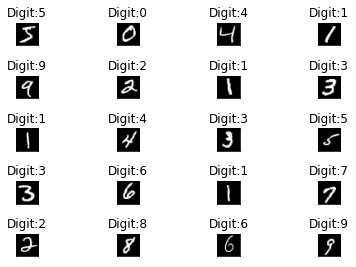

In [5]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i], cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(x_train,y_train)

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print("shape of x_train data: ",x_train.shape)
print("shape of x_test data: ",x_test.shape)
print("shape of y_train data: ",y_train.shape)
print("shape of y_test data: ",y_test.shape)

shape of x_train data:  (60000, 28, 28, 1)
shape of x_test data:  (10000, 28, 28, 1)
shape of y_train data:  (60000, 10)
shape of y_test data:  (10000, 10)


## LeNet-5 structure
ref :https://en.wikipedia.org/wiki/LeNet
```
 {
   "input"    : "a 32x32 picture",
   "output"   : "10 classes [0~9]",
   "database" : {
      "name"    :"MNIST",
      "img_size":"28x28",
    },
   "training" : {
      "weighting" : ["kernel","bias"],
      "method"    : "backpropagation"
   },
   "structure":{
      "conv-layer"      : 3,
      "pooling-layer"   : 2,
      "full-connected"  : 1
   }
 }
 ```
 <img src= "https://world4jason.gitbooks.io/research-log/content/deepLearning/CNN/img/lenet.png"> </img>

* The input layer consists of (32 x 32 x 1) dimension images. As the images are 28 x 28, they are padded with 0s to make them 32 x 32.
* Convolution Layer 1 : Consists of 6 filters of size 5 x 5. Gives an output of shape (28 x 28 x 6).
* Pooling Layer 1 : Max pooling which reduces the input size in half. Output: (14 x 14 x 6).
* Convolution Layer 2 : Consists of 16 filters of size 5 x 5. Gives an output of shape (10 x 10 x 16).
* Pooling Layer 2 : Max pooling which reduces the input size in half. Output: (5 x 5 x 16)..
* The output is then flattened and passed on to a fully connected layer of 120 neurons and then 84 neurons.
* The final output is a softmax output with 10 classes.

In [7]:
#TO DO: padding to make 32x32x1
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2], [0,0]],mode='CONSTANT',constant_values=0)
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2], [0,0]],mode='CONSTANT',constant_values=0)

In [8]:
from tensorflow.keras.models import  Sequential
from keras import models, layers
import keras

In [ ]:
model = Sequential()
#l1 conv layer c1
model.add(layers.Conv2D(6,kernel_size=(5,5),activation='tanh',input_shape=(32,32,1)))
#l2 pooling layer p1
model.add(layers.AveragePooling2D(pool_size=(2,2),padding='valid'))
#l3 conv layer c2
model.add(layers.Conv2D(16,kernel_size=(5,5),activation='tanh'))
#l4 pooling layer p2
model.add(layers.AveragePooling2D(pool_size=(2,2),padding='valid'))

#l5 conv layer c3
model.add(layers.Conv2D(120, kernel_size=(5, 5), activation='tanh'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())
#l6
# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))
#l7
#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,verbose=1,validation_data=(x_test,y_test),batch_size=128)
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print("test loss:",test_loss)
print("test accuracy:",test_accuracy)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2119 - accuracy: 0.7314 - val_loss: 0.5696 - val_accuracy: 0.8722
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4768 - accuracy: 0.8777 - val_loss: 0.3867 - val_accuracy: 0.8989
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3684 - accuracy: 0.8984 - val_loss: 0.3229 - val_accuracy: 0.9097
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3180 - accuracy: 0.9091 - val_loss: 0.2851 - val_accuracy: 0.9182
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2839 - accuracy: 0.9183 - val_loss: 0.2565 - val_accuracy: 0.9255
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2569 - accuracy: 0.9255 - val_loss: 0.2343 - val_accuracy: 0.9319
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2341 - accuracy: 0.9317 - val_loss: 0.2128 - val_accuracy: 0.9367
Epoch 

In [11]:
tf.keras.backend.clear_session() 
model1 = tf.keras.Sequential([
                              layers.Conv2D(6,kernel_size=(5,5),activation='tanh',input_shape=(32,32,1)),
                              layers.AveragePooling2D(pool_size=(2,2),padding='valid'),
                              layers.Conv2D(16,kernel_size=(5,5),activation='sigmoid'),
                              layers.AveragePooling2D(pool_size=(2,2),padding='valid'),
                              layers.Conv2D(120, kernel_size=(5, 5), activation='tanh'),
                              layers.Flatten(),
                              layers.Dense(84,activation='tanh'),
                              layers.Dense(10,activation='softmax')
])

model1.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD',metrics='accuracy')


In [ ]:
model1.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2609 - accuracy: 0.2096 - val_loss: 2.1623 - val_accuracy: 0.4001
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 1.6556 - accuracy: 0.6112 - val_loss: 1.0123 - val_accuracy: 0.7619
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7582 - accuracy: 0.8048 - val_loss: 0.5818 - val_accuracy: 0.8477
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5262 - accuracy: 0.8572 - val_loss: 0.4543 - val_accuracy: 0.8769
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4383 - accuracy: 0.8770 - val_loss: 0.3942 - val_accuracy: 0.8887
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3906 - accuracy: 0.8871 - val_loss: 0.3574 - val_accuracy: 0.8936
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3600 - accuracy: 0.8940 - val_loss: 0.3332 - val_accuracy: 0.9012
Epoch 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               